In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/colab work ML/Data/polynomial_regression_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/colab work ML/Data/polynomial_regression_train.csv')

In [ ]:
class PolynomialGradientDescent:

    def __init__(self, iterations=1000, iteration_rate=0.01, degree=2):
        self.w = None
        self.b = None
        self.iterations = iterations
        self.iteration_rate = iteration_rate
        self.degree = degree

    def loss(self, x, y):
        LHS = np.dot(x, self.w) + self.b
        RHS = y
        return np.sum((LHS - RHS)**2) / (2 * len(y))

    def diff(self, x, y):
        L = np.dot(x, self.w) + self.b
        R = y
        dw = np.dot(x.T, (L - R)) / len(y)
        db = np.sum(L - R) / len(y)
        return dw, db

    def execute(self, x, y, verbose=False, print_iteration=100, graph_cost=False):
        self.w = np.zeros(x.shape[1])
        self.b = 0
        cost_history = []

        for i in range(self.iterations):
            dw, db = self.diff(x, y)
            self.w -= self.iteration_rate * dw
            self.b -= self.iteration_rate * db
            cost = self.loss(x, y)
            if verbose and i % print_iteration == 0:
                print(f'{i}th iteration: error = {cost}')
            cost_history.append(cost)

        if graph_cost:
            plt.plot(range(self.iterations), cost_history, label="Cost Function")
            plt.xlabel('Iteration')
            plt.ylabel('Cost')
            plt.title('Cost Function vs Iterations')
            plt.grid(True)
            plt.legend()
            plt.show()

        return self.w, self.b, cost_history

    def Predict(self, x):
        return np.dot(x, self.w) + self.b

    def R_2(self, x, y):
        y_mean = np.mean(y)
        y_pred = self.Predict(x)
        N = np.sum((y - y_pred)**2)
        D = np.sum((y - y_mean)**2)
        return (1 - (N / D))


def Normalize(x):
    mean = np.mean(x, axis=0)
    dev = np.std(x, axis=0)
    return (x - mean) / dev

def PolynomialFeatures(x, degree=2):
    n_samples, n_features = x.shape
    features = [x]

    for d in range(2, degree + 1):
        for _ in range(n_features):
            poly_terms = np.array([x[:, i] ** d for i in range(n_features)]).T
            features.append(poly_terms)

    for d in range(2, degree + 1):
        for i in range(n_features):
            for j in range(i + 1, n_features):
                interaction_term = (x[:, i] * x[:, j]).reshape(-1, 1)
                features.append(interaction_term)

    return np.hstack(features)




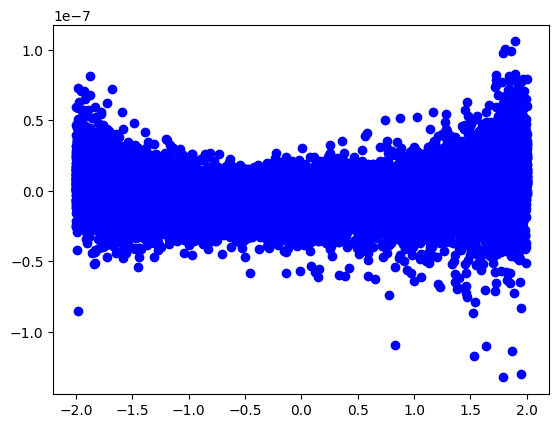

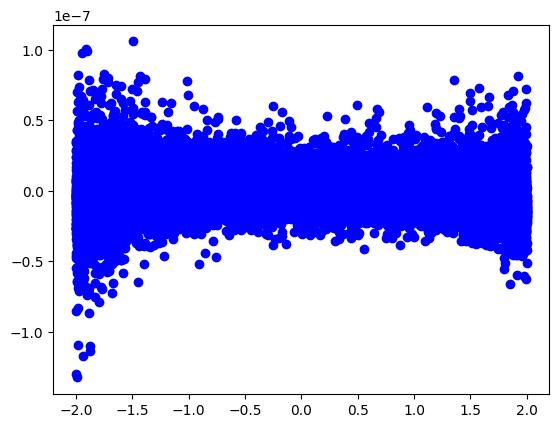

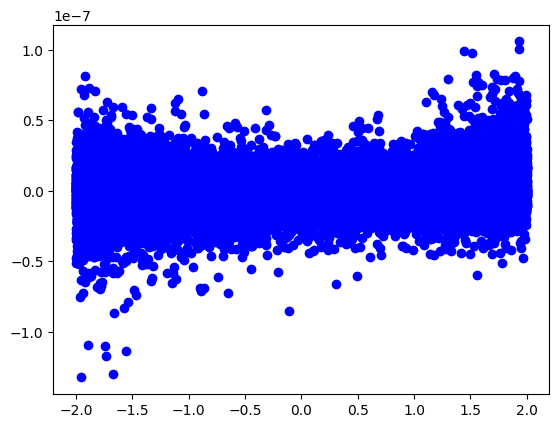

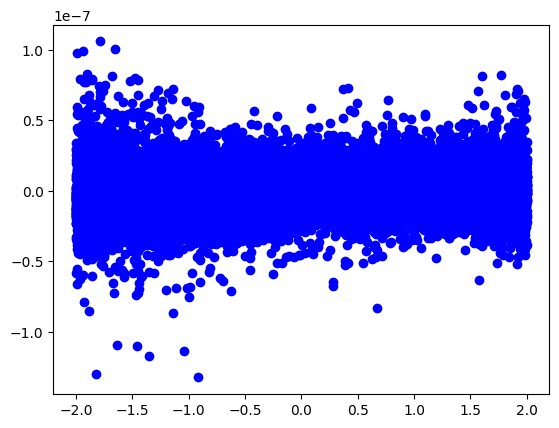

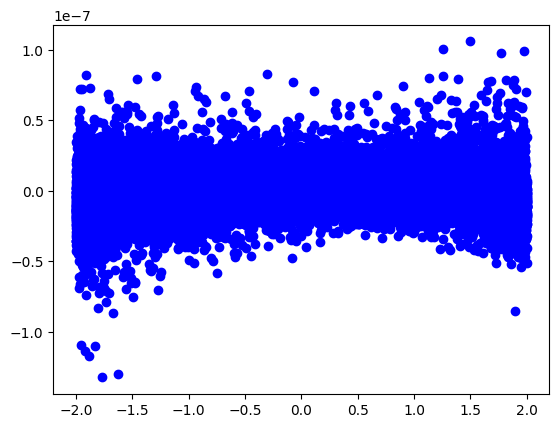

In [ ]:
for i in range(1,6):
  plt.scatter(df_train.iloc[:, i].values, df_train.iloc[:, 6].values, color='blue', label="Original Data")
  plt.show()

In [ ]:
X_train_pre = df_train.iloc[:, 1:6].values
X_train_pre
X_train_pre = Normalize(X_train_pre)

In [ ]:
Y_train_pre = df_train.iloc[:, 6].values
Y_train_pre

array([ 8.16874285e-10, -5.08122456e-10,  4.56017046e-10, ...,
       -1.09620443e-08,  1.96209742e-09,  5.00055158e-10])

In [ ]:
pgd = PolynomialGradientDescent(iterations=60000, iteration_rate=0.0001, degree=3)

0th iteration: error = 5.707488210447507e-17
1000th iteration: error = 4.4245332707605646e-17
2000th iteration: error = 3.83832470081353e-17
3000th iteration: error = 3.509747842732909e-17
4000th iteration: error = 3.3173871358120066e-17
5000th iteration: error = 3.2008705598574565e-17
6000th iteration: error = 3.12825504665051e-17
7000th iteration: error = 3.0819557561525506e-17
8000th iteration: error = 3.0519079279226234e-17
9000th iteration: error = 3.032138694795973e-17
10000th iteration: error = 3.018990584960009e-17
11000th iteration: error = 3.010165995325488e-17
12000th iteration: error = 3.004192734483988e-17
13000th iteration: error = 3.000113482277712e-17
14000th iteration: error = 2.9972990404389675e-17
15000th iteration: error = 2.99533271905579e-17
16000th iteration: error = 2.993937086487601e-17
17000th iteration: error = 2.992926735056124e-17
18000th iteration: error = 2.9921774257864425e-17
19000th iteration: error = 2.9916057447988683e-17
20000th iteration: error = 2

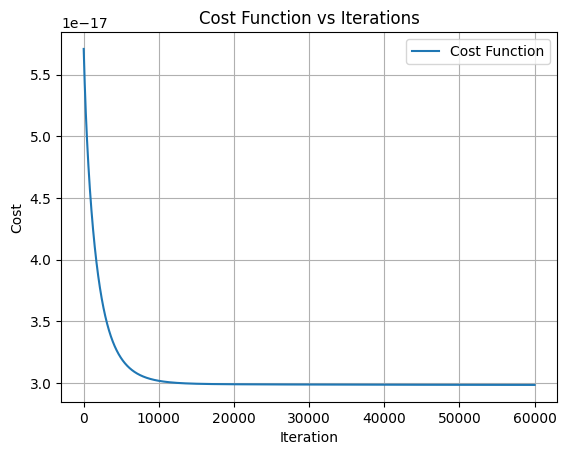

In [ ]:
_, _, cost_history = pgd.execute(PolynomialFeatures(X_train_pre, degree=3), Y_train_pre, verbose=True, print_iteration=1000, graph_cost=True)

In [ ]:
pgd.Predict(PolynomialFeatures(X_train_pre, degree=3))

array([ 2.31687986e-09, -2.44692251e-09,  4.62453705e-09, ...,
       -7.62288867e-09,  3.27993542e-09, -2.43741907e-09])

In [ ]:
pgd.R_2(PolynomialFeatures(X_train_pre, degree=3), Y_train_pre)

0.47657975646599127

In [ ]:
prediction = pgd.Predict(PolynomialFeatures(X_train_pre, degree=3))